In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('sales_data_sample.csv', engine = 'python')

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,NEW_DATE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small,2003-02-24
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,Reims,France,Henriot,Paul,Small,2003-05-07
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Paris,France,Da Cunha,Daniel,Medium,2003-07-01
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium,2003-08-25
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium,2003-10-10


In [4]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [4]:
# checking for null values

data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
NEW_DATE            0
dtype: int64

In [7]:
# dropping unnecesary columns

drop_cells = ['ADDRESSLINE2','POSTALCODE','TERRITORY']
data = data.drop(drop_cells, axis = 1)
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium


In [8]:
# checking the properties of the date column

data['ORDERDATE'].head(100)

0      2/24/2003 0:00
1       5/7/2003 0:00
2       7/1/2003 0:00
3      8/25/2003 0:00
4     10/10/2003 0:00
           ...       
95     8/27/2004 0:00
96     9/30/2004 0:00
97    10/15/2004 0:00
98     11/2/2004 0:00
99    11/15/2004 0:00
Name: ORDERDATE, Length: 100, dtype: object

In [18]:
# standardizing the date column

data['NEW_DATE']=pd.to_datetime(data['ORDERDATE'], infer_datetime_format =True)
data = data.drop(columns=['ORDERDATE'])


In [19]:
date = data['NEW_DATE'].dt.day
date.head()
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,NEW_DATE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small,2003-02-24
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,France,Henriot,Paul,Small,2003-05-07
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,France,Da Cunha,Daniel,Medium,2003-07-01
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium,2003-08-25
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium,2003-10-10


In [5]:
state = data['STATE'].unique()
state.sort
state

array(['NY', nan, 'CA', 'Victoria', 'NJ', 'CT', 'MA', 'PA', 'NSW',
       'Queensland', 'BC', 'Tokyo', 'NH', 'Quebec', 'Osaka',
       'Isle of Wight', 'NV'], dtype=object)

In [6]:
city = data['CITY'].unique()
city.sort
city

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'San Francisco', 'Burlingame',
       'Lille', 'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Los Angeles', 'San Diego', 'Bruxelles',
       'Tsawassen', 'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus',
       'Glendale', 'Sevilla', 'Brisbane', 'Strasbourg', 'Las Vegas',
       'Oslo', 'Bergamo', 'Glen Waverly', 'Munich', 'Charleroi'],
      dtype=object)

In [17]:
# replacing the null values in the state column with the corresponding data in the city column

data['STATE'].fillna(data['CITY'], inplace=True)
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,NEW_DATE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small,2003-02-24
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,Reims,France,Henriot,Paul,Small,2003-05-07
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Paris,France,Da Cunha,Daniel,Medium,2003-07-01
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium,2003-08-25
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium,2003-10-10


In [12]:
# checking the number of unique columns in the dataset

for col in data.columns:
    print(f'Number of {col} unique values: {data[col].nunique()}')

Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of ORDERDATE unique values: 252
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of PHONE unique values: 91
Number of ADDRESSLINE1 unique values: 92
Number of CITY unique values: 73
Number of STATE unique values: 16
Number of COUNTRY unique values: 19
Number of CONTACTLASTNAME unique values: 77
Number of CONTACTFIRSTNAME unique values: 72
Number of DEALSIZE unique values: 3
Number of NEW_DATE unique values: 252


In [5]:
# checking iof there still anymore null values

data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
NEW_DATE            0
dtype: int64

In [18]:
# saving the data

data.to_csv('modified_sales.csv', index=False)

# Some Data Exploration

#### What was the best year for sales and how much was earned that year

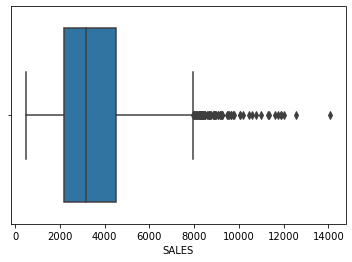

In [7]:
sns.boxplot(x = data['SALES'])

In [6]:
data.groupby(['YEAR_ID']).sum()


# from the result below it is seen that the best year for sales was 2003 with total sales of 3516979.54

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,MSRP
YEAR_ID,,,,,,,,
2003,10158099,34612,83793.14,6709,3516979.54,3102,8243,101589
2004,13834764,46824,112488.10,8690,4724162.60,3916,10344,134851
2005,4967518,17631,39886.83,2855,1791486.71,654,1435,47880


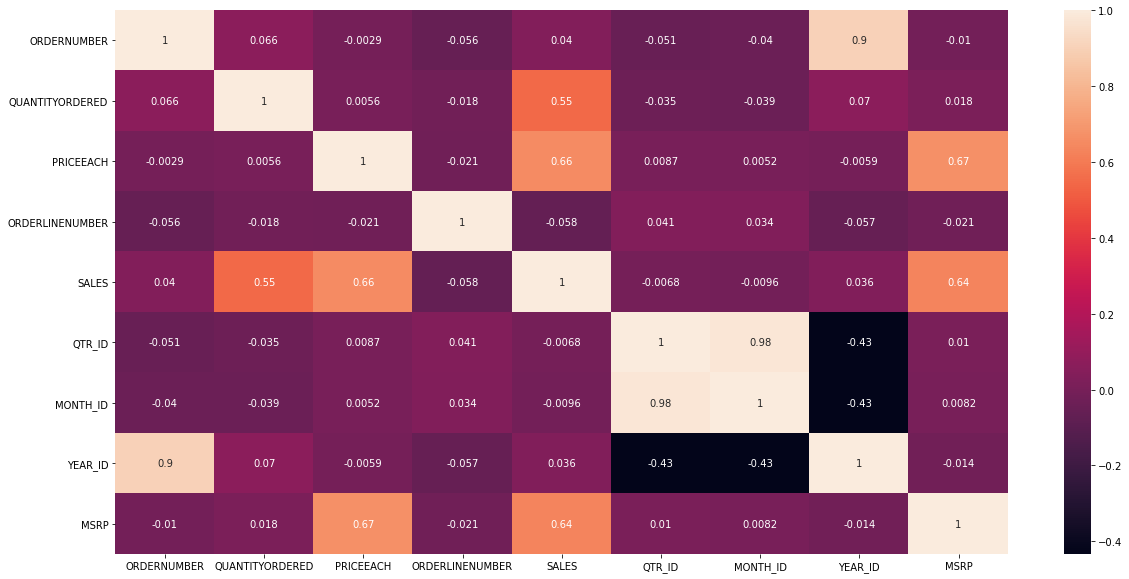

In [10]:
#visualizing the relationship between varaibles using an heatmap
plt.figure(figsize = (20,10))
data = data.corr()

sns.heatmap(data, annot= True)

#### which countery sold the most product

In [49]:
df11 = data.groupby(['COUNTRY']).sum()
df11.sort_values('SALES', ascending = False)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
COUNTRY,,,,,,,,,
USA,10297362,35659,84159.65,6369,3627982.83,2814,7380,2011812,101539
Spain,3513645,12429,28042.54,2186,1215686.92,859,2299,685341,33201
France,3223513,11090,25920.87,2028,1110916.52,776,1960,629233,31330
Australia,1898841,6246,15449.14,1181,630623.10,511,1345,370706,18493
UK,1476792,5013,11882.70,1027,478880.46,431,1166,288533,13876
Italy,1158239,3773,9329.40,890,374674.31,329,868,226422,11119
Finland,944808,3192,7722.15,587,329581.91,202,485,184374,9360
Norway,869325,2842,7318.18,559,307463.70,275,710,170287,8956
Singapore,806424,2760,6581.90,544,288488.41,212,564,158278,8378


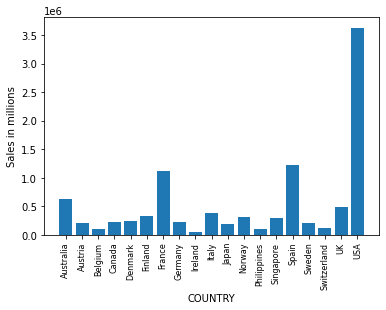

In [55]:
import matplotlib.pyplot as plt

keys = [COUNTRY for COUNTRY, df in data.groupby(['COUNTRY'])]

plt.bar(keys, data.groupby(['COUNTRY']).sum()['SALES'])
plt.ylabel('Sales in millions')
plt.xlabel('COUNTRY')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### What product sold the most

In [35]:
df = data[['PRODUCTLINE','QUANTITYORDERED']].groupby(['PRODUCTLINE']).sum()
df.sort_values('QUANTITYORDERED', ascending = False)

# Clasic car sold the most units with 33,992 units sold

,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,33992
Vintage Cars,21069
Motorcycles,11663
Trucks and Buses,10777
Planes,10727
Ships,8127
Trains,2712


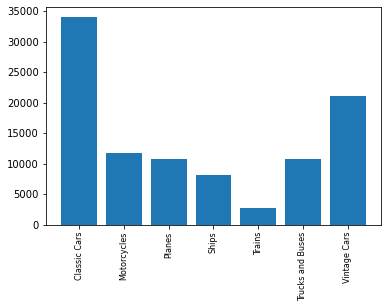

In [56]:
product = data.groupby('PRODUCTLINE')
quantity_ordered = product.sum()['QUANTITYORDERED']

keys = [PRODUCTLINE for PRODUCTLINE, df in product]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [42]:
df1 = data[['PRODUCTLINE','QUANTITYORDERED', 'SALES']].groupby(['PRODUCTLINE']).sum()
df1.sort_values('SALES', ascending = False)

# Classic cars also made the most in sales with 3,919,615.66

,QUANTITYORDERED,SALES
PRODUCTLINE,,
Classic Cars,33992,3919615.66
Vintage Cars,21069,1903150.84
Motorcycles,11663,1166388.34
Trucks and Buses,10777,1127789.84
Planes,10727,975003.57
Ships,8127,714437.13
Trains,2712,226243.47


#### what customeer bought the most product

In [45]:
df2 = data[['PRODUCTLINE','QUANTITYORDERED', 'SALES', 'CUSTOMERNAME']]
df2.sort_values('SALES', ascending = False)

# The Sharp Gifts Warehouse bought the most product wih 76 products ordered and 14,082 in sales

,PRODUCTLINE,QUANTITYORDERED,SALES,CUSTOMERNAME
598,Vintage Cars,76,14082.80,The Sharp Gifts Warehouse
744,Vintage Cars,50,12536.50,Online Diecast Creations Co.
53,Classic Cars,50,12001.00,Euro Shopping Channel
1062,Classic Cars,60,11887.80,Euro Shopping Channel
104,Motorcycles,66,11886.60,"UK Collectables, Ltd."
...,...,...,...,...
1818,Classic Cars,15,640.05,Salzburg Collectables
1551,Vintage Cars,20,577.60,Amica Models & Co.
2044,Vintage Cars,15,553.95,"Tokyo Collectables, Ltd"
1287,Vintage Cars,6,541.14,The Sharp Gifts Warehouse


In [46]:
# Total sales is 10,032,628.85

data['SALES'].sum()

10032628.85

In [97]:
df3 = data[['DEALSIZE', 'CONTACTLASTNAME','CONTACTFIRSTNAME']]
df3


,DEALSIZE,CONTACTLASTNAME,CONTACTFIRSTNAME
0,Small,Yu,Kwai
1,Small,Henriot,Paul
2,Medium,Da Cunha,Daniel
3,Medium,Young,Julie
4,Medium,Brown,Julie
...,...,...,...
2818,Small,Freyre,Diego
2819,Medium,Koskitalo,Pirkko
2820,Medium,Freyre,Diego
2821,Small,Roulet,Annette
